In [ ]:
# Description : This program uses the Moving Average Convergence/Divergence (MACD) crossover
#               to determine when to buy and sell stocks 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
!pip install yahoofinancials --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=fc490891abf774400df2ec52bd2d2b570fc95cef8bc4b64879e9b4988b25f834
  Stored in directory: /tmp/pip-ephem-wheel-cache-mewh7l8t/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance
  Created wheel for yahoofinancials: filename=yahoofinancials-1.5-cp36-none-any.whl size=15195 sha256=5ba9a8dcaaf9c0209f490fb2fb55ecf086cc28e56a2a382478240fd097fa53f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-74eejy3z/wheels/42/15/e7/240c5cdc8782b9479ba73404640a3be57bb4053a5c3edd6be5
Successfully built yahoofinancials


In [ ]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
# Define ticker symbol
ticker = 'AAPL'
# Get data from this symbol
tickerData = yf.Ticker(ticker)
# get the historical prices from this ticker
today = date.today()
print("today : " + str(today))
aapl = tickerData.history(period='1d', start='2020-01-01', end=today)
# see aapl data
aapl.head()

today : 2020-07-01


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,294.74,299.08,293.70,298.83,33870100,0.0,0
2020-01-03,295.65,299.06,295.00,295.92,36580700,0.0,0
2020-01-06,292.30,298.44,291.27,298.28,29596800,0.0,0
2020-01-07,298.32,299.38,295.97,296.88,27218000,0.0,0
2020-01-08,295.66,302.90,295.66,301.66,33019800,0.0,0


In [ ]:
# Removing Dividens and Stocks Splits
aapl = aapl.drop(columns=["Dividends", "Stock Splits"])
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,294.74,299.08,293.70,298.83,33870100
2020-01-03,295.65,299.06,295.00,295.92,36580700
2020-01-06,292.30,298.44,291.27,298.28,29596800
2020-01-07,298.32,299.38,295.97,296.88,27218000
2020-01-08,295.66,302.90,295.66,301.66,33019800


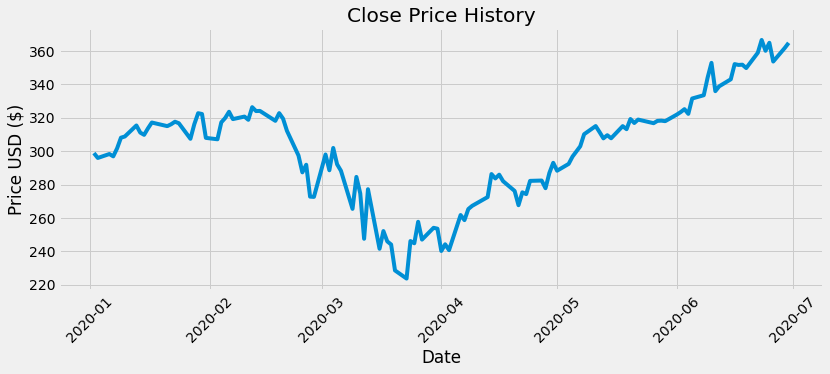

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(aapl.index, aapl.Close, label='Close')
plt.title('Close Price History')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [ ]:
# Calculate the MACD and Signal line indicators
# Calculate the short term exponential moving average (EMA)
shortEMA = aapl.Close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponential moving average (EMA)
longEMA = aapl.Close.ewm(span=26, adjust=False).mean()
# Calculate MACD line
MACD = shortEMA - longEMA
# Calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()

In [ ]:
# A sell signal is when the Signal Line crosses the MACD Line upward
# A buy signal is when the Signal Line crosses the MACD Line downward

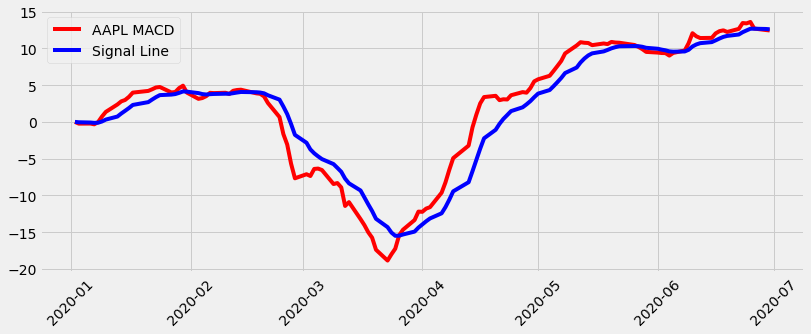

In [ ]:
# Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(aapl.index, MACD, label='AAPL MACD', color='red')
plt.plot(aapl.index, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create new columns for the data
aapl['MACD'] = MACD
aapl['Signal Line'] = signal
#show the data
aapl.head()

,Open,High,Low,Close,Volume,MACD,Signal Line
Date,,,,,,,
2020-01-02,294.74,299.08,293.70,298.83,33870100,0.000000,0.000000
2020-01-03,295.65,299.06,295.00,295.92,36580700,-0.232137,-0.046427
2020-01-06,292.30,298.44,291.27,298.28,29596800,-0.223103,-0.081762
2020-01-07,298.32,299.38,295.97,296.88,27218000,-0.325163,-0.130443
2020-01-08,295.66,302.90,295.66,301.66,33019800,-0.020109,-0.108376


In [ ]:
# Create function to signal when to buy and sell an asset
def buy_sell(stock):
  buy = []
  sell = []
  flag = -1

  for i in range(0, len(stock)):
    if stock['MACD'][i] > stock['Signal Line'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(stock['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)
    elif stock['MACD'][i] < stock['Signal Line'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(stock['Close'][i])
        flag = 0
      else:
        sell.append(np.nan)
    else:
      buy.append(np.nan)
      sell.append(np.nan)

  return (buy, sell)


In [ ]:
# Create buy and sell columns
a = buy_sell(aapl)
aapl['Buy_Signal_Price'] = a[0]
aapl['Sell_Signal_Price'] = a[1]

In [ ]:
# Show the data
aapl

,Open,High,Low,Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,
2020-01-02,294.74,299.08,293.70,298.83,33870100,0.000000,0.000000,NaN,NaN
2020-01-03,295.65,299.06,295.00,295.92,36580700,-0.232137,-0.046427,NaN,295.92
2020-01-06,292.30,298.44,291.27,298.28,29596800,-0.223103,-0.081762,NaN,NaN
2020-01-07,298.32,299.38,295.97,296.88,27218000,-0.325163,-0.130443,NaN,NaN
2020-01-08,295.66,302.90,295.66,301.66,33019800,-0.020109,-0.108376,301.66,NaN
...,...,...,...,...,...,...,...,...,...
2020-06-24,365.00,368.79,358.52,360.06,48155800,13.411826,12.450518,NaN,NaN
2020-06-25,360.70,365.00,357.57,364.84,34380600,13.604052,12.681224,NaN,NaN
2020-06-26,364.41,365.32,353.02,353.63,51314200,12.705379,12.686055,NaN,NaN


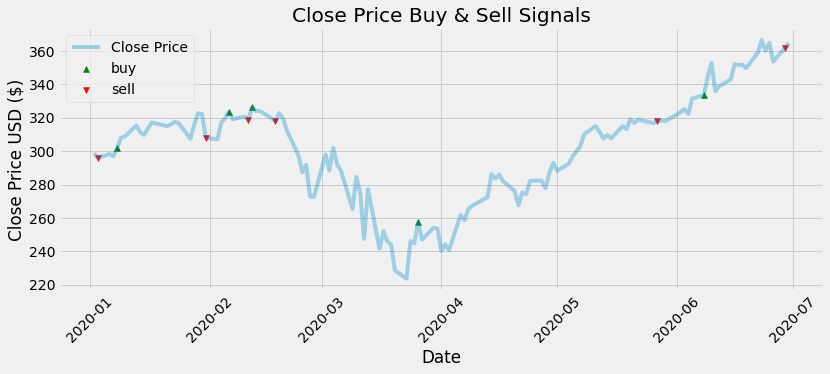

In [ ]:
# Visually show the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(aapl.index, aapl['Buy_Signal_Price'], color='green', label='buy', marker='^', alpha=1)
plt.scatter(aapl.index, aapl['Sell_Signal_Price'], color='red', label='sell', marker='v', alpha=1)
plt.plot(aapl.Close, label='Close Price', alpha=0.35)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.title('Close Price Buy & Sell Signals')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Histogram of the difference between MACD & Signal Line

In [ ]:
df = pd.DataFrame()
df['Diff'] = MACD - signal
df['MACD'] = MACD
df['Signal'] = signal
df = df.set_index(aapl.index)
df.head()

,Diff,MACD,Signal
Date,,,
2020-01-02,0.000000,0.000000,0.000000
2020-01-03,-0.185709,-0.232137,-0.046427
2020-01-06,-0.141340,-0.223103,-0.081762
2020-01-07,-0.194721,-0.325163,-0.130443
2020-01-08,0.088267,-0.020109,-0.108376


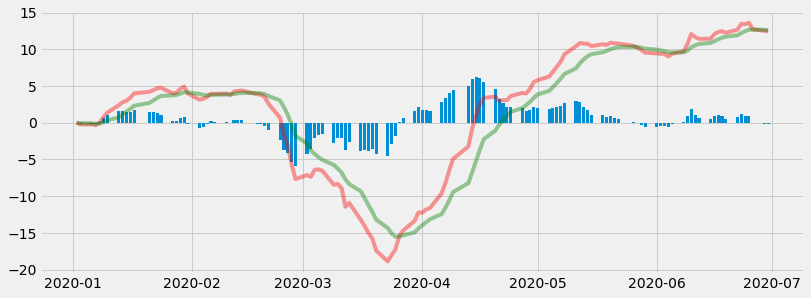

In [ ]:
# Plotting the diff

plt.figure(figsize=(12.2, 4.5))
plt.bar(df.index, df['Diff'])
plt.plot(df.index, df['MACD'], label='MACD', color='red', alpha=0.4)
plt.plot(df.index, df['Signal'], label='Signal Line', color='green', alpha=0.4)
plt.show()

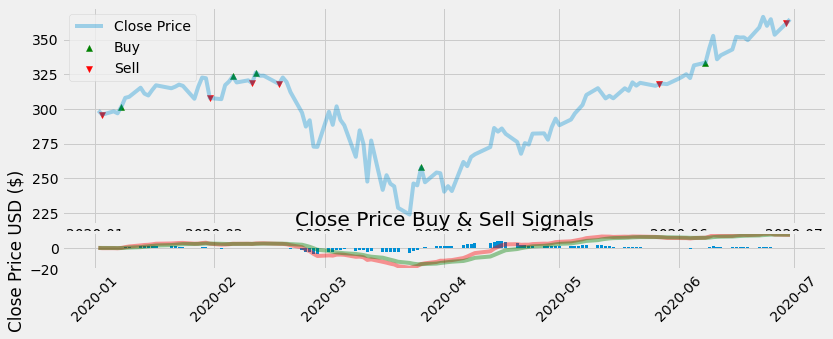

In [ ]:
##
# FINAL PLOT
##
plt.figure(figsize=(12.2, 4.5))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.scatter(aapl.index, aapl['Buy_Signal_Price'], label='Buy', color='g', marker='^')
ax1.scatter(aapl.index, aapl['Sell_Signal_Price'], label='Sell', color='r', marker='v')
ax1.plot(aapl.index, aapl['Close'], label='Close Price', alpha=0.35)
ax1.legend(loc='upper left')
plt.ylabel('Close Price USD ($)')
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation=45)

ax2.bar(df.index, df['Diff'], label='Diff')
ax2.plot(df.index, df['MACD'], label='MACD', color='r', alpha=0.4)
ax2.plot(df.index, df['Signal'], label='Signal Line', color='g', alpha=0.4)

plt.show()